# Bankruptcy Prevention

This is a classification-based project.

Business Objective:

   -This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy).
   -The goal here is to model the probability that a business goes bankrupt from different features.

Details

  - The data file contains 7 features about 250 companies including the following variables:
  - industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
  - management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
  - financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
  - credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
  - competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
  - operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.

class: bankruptcy, non-bankruptcy (target variable).

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_excel('bankruptcy-prevention.xlsx') 

In [3]:
data 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# Exploratory Data Analysis

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
#Checking null values
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [6]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data['class'].unique() 

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [8]:
data['class'].value_counts()  

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [9]:
data[data.duplicated()].shape  

(147, 7)

In [10]:
new_data = data.drop_duplicates() 

In [11]:
new_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [12]:
data['industrial_risk'].value_counts() 

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

# Visualization

### Pairplot

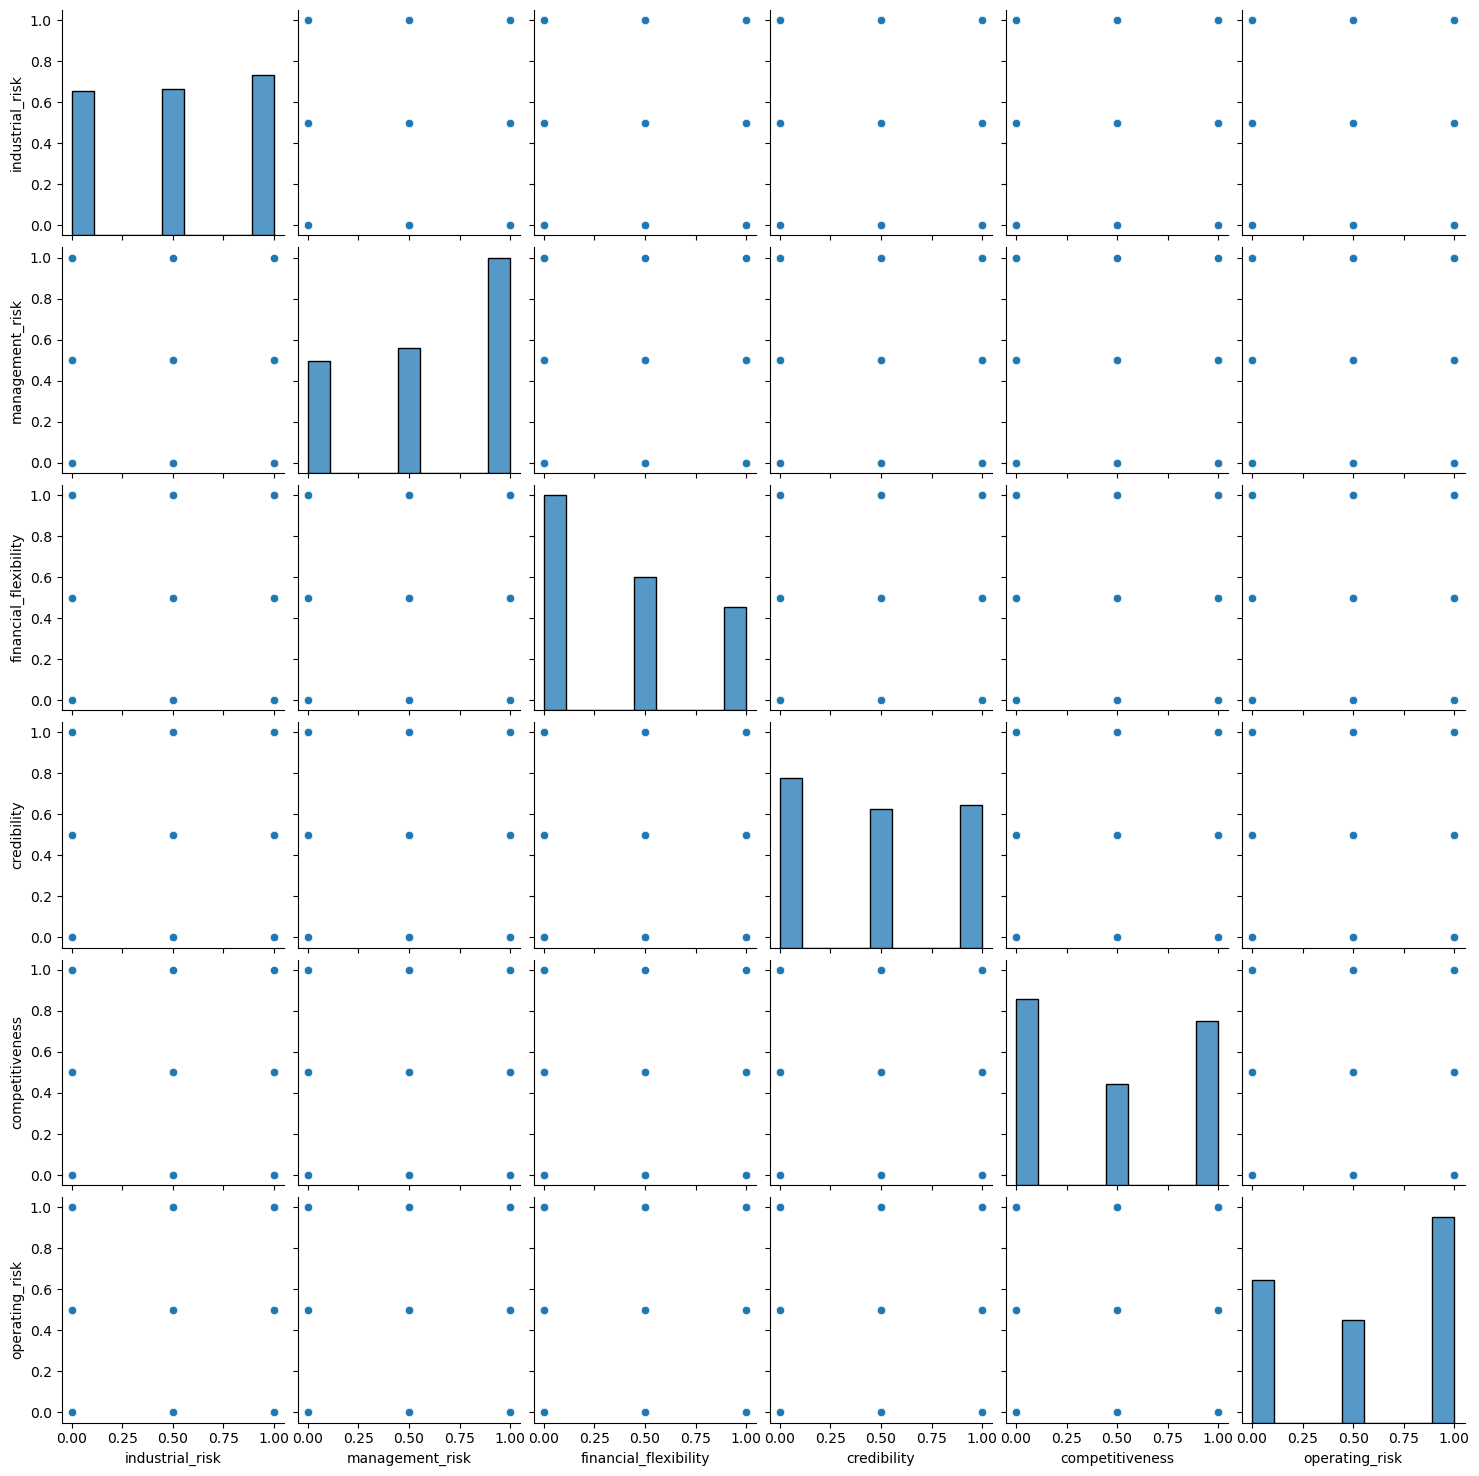

In [13]:
sns.pairplot(data) 

### Histogram

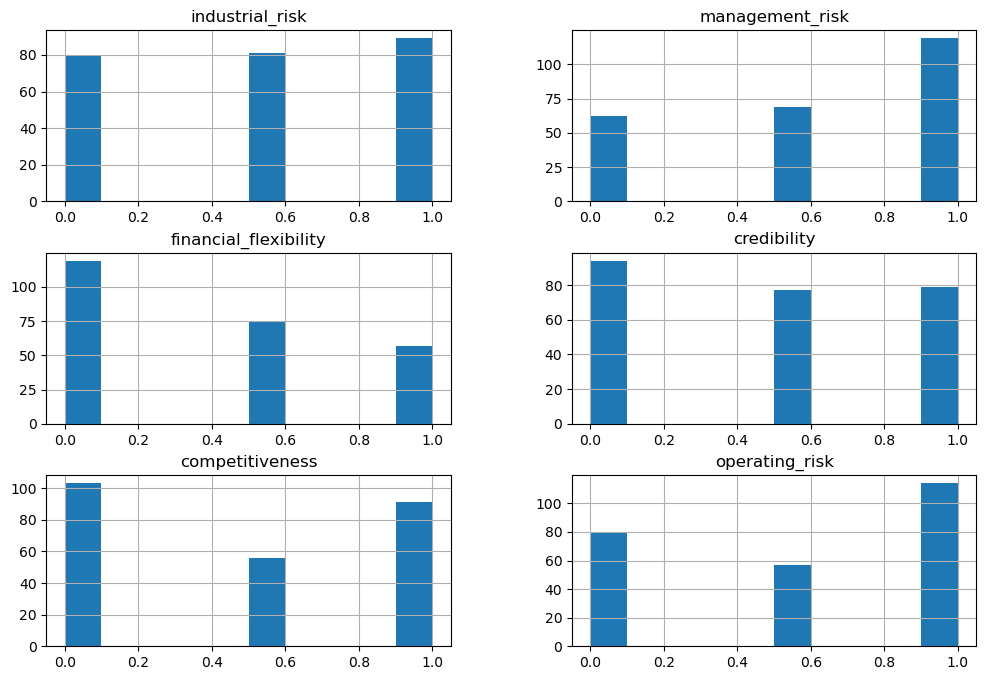

In [14]:
data.hist(figsize=(12,8))
plt.show()   

### Density Plots

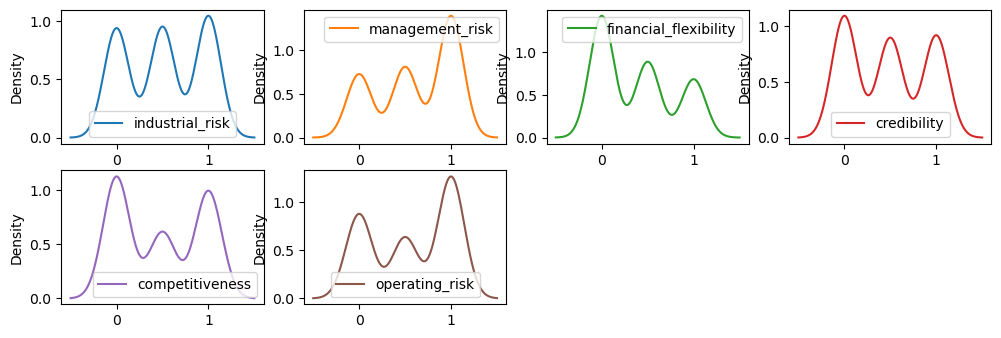

In [15]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(12,8))
plt.show() 

### Box Plots

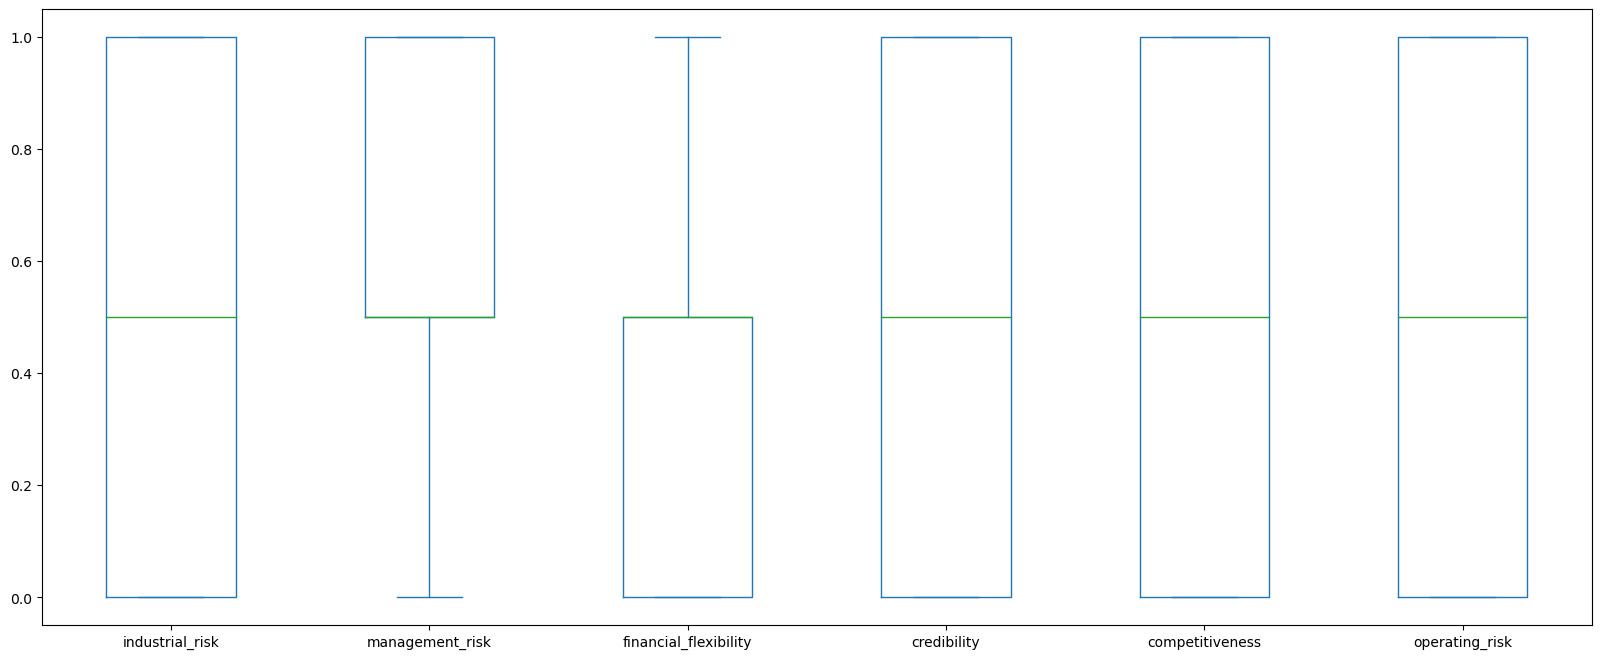

In [16]:
data.plot(kind='box',figsize=(20,8))
plt.show() 

# Pie Chart

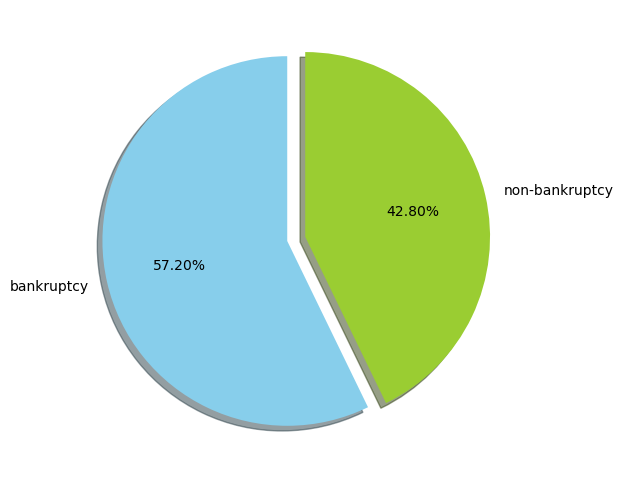

In [17]:
a =data['class'].value_counts()[0]     #......0 =555
b =data['class'].value_counts()[1]     #......1 =783


fig1, ax1 = plt.subplots(figsize=(8, 6))
label = ['bankruptcy', 'non-bankruptcy']
count = [a, b]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0.1)  # explode 2nd slice
plt.pie(count, labels=label, autopct='%0.2f%%', explode=explode, colors=colors,shadow=True, startangle=90)
plt.show() 

# Label Encoding 

In [18]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['class'] = encode.fit_transform(data['class'])
data 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


# Model Training

In [19]:
X = data.drop(['class'],axis=1)
y = data['class']  

In [20]:
X 

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [21]:
y 

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int32

In [22]:
#train, test = train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) 

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_LR = LogisticRegression(random_state= 42)
results_LR = cross_val_score(model_LR, X, y, cv= kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_LR}')
print(f'Average score: {"{:.2f}".format(results_LR.mean())}') 

Scores for each fold are: [1.   1.   1.   0.98 1.  ]
Average score: 1.00


In [24]:
model_LR.fit(X_train, y_train)
preds = model_LR.predict(X_test)
print("Training Accuracy: ", model_LR.score(X_train, y_train))
print('Testing Accuarcy: ', model_LR.score(X_test, y_test))

Training Accuracy:  0.9942857142857143
Testing Accuarcy:  1.0


In [25]:
print('Classification report for Logistic Regression model')
f_score_LR = f1_score(y_test, preds)
precision_LR = precision_score(y_test, preds)
recall_LR = recall_score(y_test, preds)

print('F1 is: ', f_score_LR)
print('Precision is: ', precision_LR)
print('Recall is: ', recall_LR)   

Classification report for Logistic Regression model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


# Model Evaluation

In [26]:
d1 = {'Models':['Logistic Regression'], 
      'Accuracy':[results_LR.mean()],
     'F1_Score':[f_score_LR],
     'Precision':[precision_LR],
     'Recall':[recall_LR]}
results_df = pd.DataFrame(d1)
results_df.sort_values(by=['Accuracy'], ascending=False)  

,Models,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.996,1.0,1.0,1.0
